$$\Huge \text {Transfer Learning}$$

[Ref](https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e)

# 1. What is transfer learning ?

# 2. Why does transfer learning work so well ?

# 3. Coding your first image recognizer using transfer learning

# 1. What Is Transfer Learning ?
Convolutional Neural Networks can learn extremely complex mapping functions when trained on enough data. We can’t yet understand how a convolutional net learns such complicated functions.

<img src='https://miro.medium.com/max/4688/1*3aT9KWCeQ6wIYdLLhD4mCw.png' />

> Basically the training of a CNN involves, finding of the right values on each of the filters so that an input image when passed through the multiple layers, activates certain neurons of the last layer so as to predict the correct class.

Though training a CNN from scratch is possible for small projects, most applications require the training of very large CNN’s and this as you guessed, takes extremely huge amounts of processed data and computational power. And both of these are not found so easily these days.

**That’s where transfer learning comes into play.** 

In transfer learning, we take the pre-trained weights of an already trained model(one that has been trained on millions of images belonging to 1000’s of classes, on several high power GPU’s for several days) and use these already learned features to predict new classes.

## The advantages of transfer learning are that:

### 1: There is no need of an extremely large training dataset.

### 2: Not much computational power is required. As we are using pre-trained weights and only have to learn the weights of the last few layers.

There are several models that have been trained on the image net dataset and have been open sourced.

For example, **VGG-16, VGG-19, Inception-V3 etc.** 

For more details about each of these models, read the official keras documentation [here](https://keras.io/applications/).

# 2. Why Does Transfer Learning Work So Well ?

When we train a deep network, out goal is to find the optimum values on each of these filter matrices so that when an image is propagated through the network, the output activations can be used to accurately find the class to which the image belongs.

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from keras.models import load_model

model = ResNet50(weights='resnet50_weights_tf_dim_ordering_tf_kernels.h5')


Using TensorFlow backend.


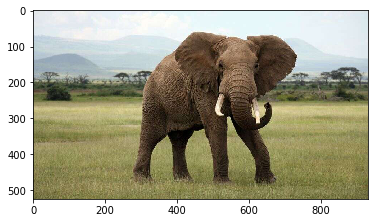

In [3]:
img_path = 'iStock-elephant.jpg'
import matplotlib.pyplot as plt
im = plt.imread(img_path)
plt.imshow(im)

In [5]:
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
import time
s= time.time()
preds = model.predict(x)
print('Predict time: ', time.time()-s)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predict time:  0.05405378341674805
Predicted: [('n02504458', 'African_elephant', 0.4886297), ('n01871265', 'tusker', 0.40515703), ('n02504013', 'Indian_elephant', 0.05687927)]


When we train a conv net on the imagenet dataset and then take a look at what the filters on each layer of the conv net has learnt to recognize, or what each filter gets activated by, we are able to see something really interesting.

<img src='https://miro.medium.com/max/1814/1*jPCEik198_CjtmSL2H6o4g.png' />

The filters on the first few layers of the conv net learn to recognize colors and certain horizontal and vertical lines.

The next few layers slowly learn to recognize trivial shapes using the lines and colors learnt in the previous layers.

Then the next layers learn to recognize textures, then parts of objects like legs, eyes, nose etc.

Finally the filters in the last layers get activated by whole objects like dogs, cars etc.

<img src='https://miro.medium.com/max/1636/1*1Y6HZxK-lOmqB8KnizTCow.png' />

### Now lets get to transfer learning.

By using a pretrained network to do transfer learning, we are simply adding a few dense layers at the end of the pretrained network and learning what combination of these already learnt features help in recognizing the objects in our new dataset.

Hence we are **training only a few dense layers**. Furthermore, we are **using a combination of these already learnt** trivial features to **recognize new objects.** All this helps in making the **training process very fast** and **require very less training data** compared to training a conv net from scratch.


# Now lets build an actual image recognition model using transfer learning in Keras.

### The model that we’ll be using here is the MobileNet.

Mobile net is a model which gives reasonably good imagenet classification accuracy and occupies very less space. (17 MB ).

### Data Requirement:

* The training data must be stored in a particular format in order to be fed into the network to train. 

> We will be using ImageDataGenerator, available in keras to train our model on the available data. That way the process becomes much simpler in terms of code.

* There must be a main data folder, inside that data folder, there must be a folder for each class of data containing the corresponding images. The names of the folders must be the names of their respective classes.

### The building of a model is a 3 step process:

#### 1. Importing the pre-trained model and adding the dense layers.

Then import the pre-trained MobileNet model. 

The Mobilenet (trained on the imagenet dataset for a thousand classes) will have a last layer consisting of 1000 neurons (one for each class). 

We want as many neurons in the last layer of the network as the number of classes we wish to identify. So we discard the 1000 neuron layer and add our own last layer for the network.

#### Full MobileNet

In [6]:
from keras.applications import MobileNet
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights=None) 
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

#### Remove top

In [7]:
from keras.applications import MobileNet
#imports the mobilenet model and discards the last 1000 neuron layer.
base_model=MobileNet(weights='mobilenet_1_0_224_tf_no_top.h5',include_top=False) 

In [8]:
base_model.summary()

Model: "mobilenet_1.00_None"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None,

#### Add dense

In [31]:
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
x=base_model.output
x=GlobalAveragePooling2D()(x)
#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) 
x = Dropout(0.5)(x)
#dense layer 2
x=Dense(1024,activation='relu')(x)
#dense layer 3
x = Dropout(0.5)(x)
x=Dense(512,activation='relu')(x)
#final layer with softmax activation
preds=Dense(3,activation='softmax')(x) 

In [32]:
from keras.models import Model
model=Model(inputs=base_model.input,outputs=preds)

In [33]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

#### 2. Load data and train

In [34]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [35]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./train/', # this is where you specify the path to the main data folder
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 197 images belonging to 3 classes.


In [36]:
label_names = list(train_generator.class_indices.keys())

#### Train

In [53]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
6/6 [==============================] - 4s 719ms/step - loss: 1.2020 - accuracy: 0.9062
Epoch 2/10
6/6 [==============================] - 1s 141ms/step - loss: 0.6557 - accuracy: 0.9493
Epoch 3/10
6/6 [==============================] - 1s 170ms/step - loss: 0.3008 - accuracy: 0.9479
Epoch 4/10
6/6 [==============================] - 1s 155ms/step - loss: 0.1115 - accuracy: 0.9697
Epoch 5/10
6/6 [==============================] - 1s 171ms/step - loss: 0.1736 - accuracy: 0.9455
Epoch 6/10
6/6 [==============================] - 1s 157ms/step - loss: 0.0898 - accuracy: 0.9758
Epoch 7/10
6/6 [==============================] - 1s 122ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 8/10
6/6 [==============================] - 1s 159ms/step - loss: 0.0813 - accuracy: 0.9697
Epoch 9/10
6/6 [==============================] - 1s 158ms/step - loss: 0.0770 - accuracy: 0.9879
Epoch 10/10
6/6 [==============================] - 1s 152ms/step - loss: 0.0388 - accuracy: 0.9879


#### Predict

In [52]:
import cv2
def predict(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,(224,224))
    plt.imshow(img)
    y_hat = model.predict(img.reshape(-1,224,224,3))[0]
    print(y_hat)
    idx = np.argmax(y_hat)
    label = label_names[idx]
    conf = y_hat[idx] * 100
    plt.title(f'{label}: {conf:2}%')
    return label, conf

[[3.416017e-08 5.322117e-15 1.000000e+00]]


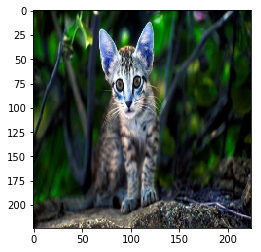

In [51]:
predict('cat_01.jpg')

[1.6135702e-05 3.6594470e-09 9.9998391e-01]


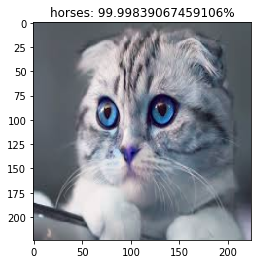

In [44]:
_,_=predict('train/cats/images (1).jpg')

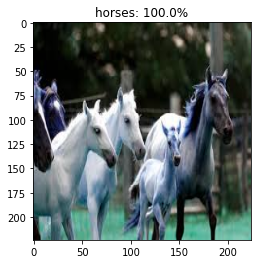

In [39]:
_,_=predict('train/horses/images (39).jpg')

In [56]:
!ls train/horses/ | wc -l

56
